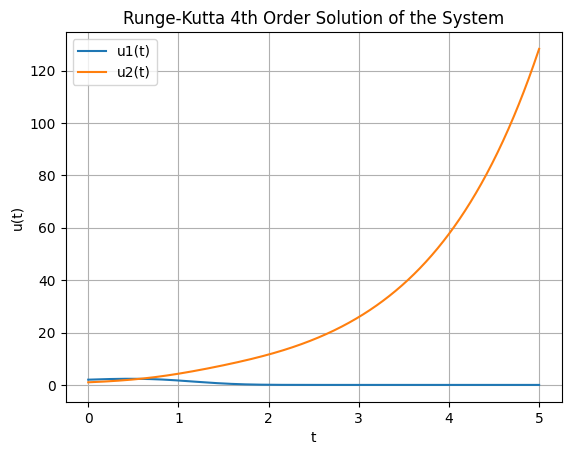

In [9]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the system of ODEs
def odes(t, u):
    u1, u2 = u
    return [1.2*u1 - 0.6*u1*u2, 0.8*u2 + 0.3*u1*u2]

# Initial conditions
u0 = [2, 1]
t_span = (0, 5)  # From t=0 to t=5; t = 20 leads to overflow
# Parameters for RK4
n_steps = 1000  # number of steps
# Solve the system of ODEs using the RK45 method which is based on the RK4 method
sol = solve_ivp(odes, t_span, u0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], n_steps))

# Plot the results
plt.plot(sol.t, sol.y[0], label='u1(t)')
plt.plot(sol.t, sol.y[1], label='u2(t)')
plt.legend()
plt.xlabel('t')
plt.ylabel('u(t)')
plt.title('Runge-Kutta 4th Order Solution of the System')
plt.grid(True)
plt.show()


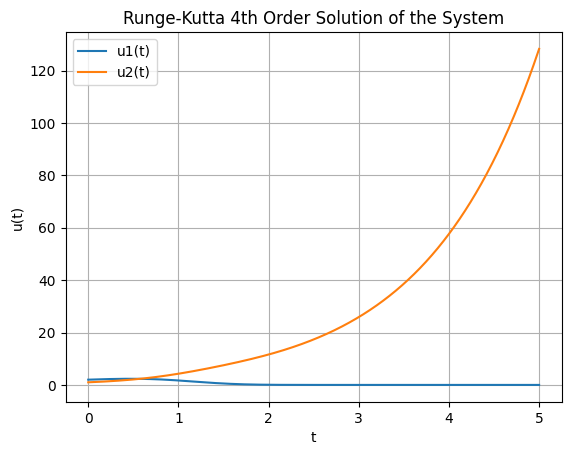

In [10]:
# Defining the RK4 method explicitly:

def rk4(ode_system, initial_conditions, t_span, n_steps):
    """
    Runge-Kutta 4 method for solving systems of ODEs.
    
    :param ode_system: Function that returns the derivatives (Right-hand side of the ODE system)
    :param initial_conditions: Initial values for the variables of the system
    :param t_span: Tuple with the initial and final times (t0, tf)
    :param n_steps: Number of steps to divide the time interval into
    :return: Times and solution of the ODE system
    """
    t0, tf = t_span  # start and end
    t = np.linspace(t0, tf, n_steps + 1)  # create time vector
    dt = (tf - t0) / n_steps  # time step
    u = np.array([initial_conditions])  # initialize the array of solutions

    # Runge-Kutta 4 method
    for i in range(n_steps):
        k1 = dt * np.array(ode_system(t[i], u[-1]))
        k2 = dt * np.array(ode_system(t[i] + dt/2, u[-1] + k1/2))
        k3 = dt * np.array(ode_system(t[i] + dt/2, u[-1] + k2/2))
        k4 = dt * np.array(ode_system(t[i] + dt, u[-1] + k3))
        u_new = u[-1] + (k1 + 2*k2 + 2*k3 + k4) / 6
        u = np.vstack((u, u_new))  # append the new values to the solutions array

    return t, u



# Solve the ODE system using the RK4 method
t_rk4, u_rk4 = rk4(odes, u0, t_span, n_steps)

# Plot the results
plt.plot(t_rk4, u_rk4[:, 0], label='u1(t)')
plt.plot(t_rk4, u_rk4[:, 1], label='u2(t)')
plt.legend()
plt.xlabel('t')
plt.ylabel('u(t)')
plt.title('Runge-Kutta 4th Order Solution of the System')
plt.grid(True)
plt.show()
